In [108]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout,Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time
import os

In [109]:
exp = 'exp-3'
label_train = np.load(os.path.join('data',exp,'array','label_train.npy'))
img_train = np.load(os.path.join('data',exp,'array','img_train.npy'))
label_val = np.load(os.path.join('data',exp,'array','label_devel.npy'))
img_val = np.load(os.path.join('data',exp,'array','img_devel.npy'))
label_test = np.load(os.path.join('data',exp,'array','label_test.npy'))
img_test = np.load(os.path.join('data',exp,'array','img_test.npy'))

In [110]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(1762, 193, 1) (599, 193, 1)
(1762,) (599,)


In [111]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)
label_test = to_categorical(label_test) 


In [112]:
print(label_train.shape, label_val.shape)

(1762, 2) (599, 2)


In [113]:

label_train = np.reshape(label_train, (label_train.shape[0], 2))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 2))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))
label_test = np.reshape(label_test, (label_test.shape[0], 2))
img_test = np.reshape(img_test, (img_test.shape[0], img_test.shape[1],  1))

In [114]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(1762, 193, 1) (599, 193, 1)
(1762, 2) (599, 2)


In [115]:
model = Sequential()
model.add(InputLayer(input_shape=(193,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 191, 8)            32        
_________________________________________________________________
batch_normalization_27 (Batc (None, 191, 8)            32        
_________________________________________________________________
activation_54 (Activation)   (None, 191, 8)            0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 95, 8)             0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 93, 16)            400       
_________________________________________________________________
batch_normalization_28 (Batc (None, 93, 16)            64        
_________________________________________________________________
activation_55 (Activation)   (None, 93, 16)           

In [116]:
if os.path.exists('model')==False:
    os.mkdir('model')

In [117]:
model_ck = 'exp-3_8.h5'
if os.path.exists(os.path.join('model',model_ck))==False:
    checkpoint = ModelCheckpoint(os.path.join('model',model_ck), monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')
else:
    print('Change model name')

In [118]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 1s 54ms/step - loss: 0.6396 - accuracy: 0.7588 - val_loss: 0.6072 - val_accuracy: 0.6945

Epoch 00001: val_accuracy improved from -inf to 0.69449, saving model to model/exp-3_8.h5
Epoch 2/200
5/5 [==============================] - 0s 21ms/step - loss: 0.3276 - accuracy: 0.8780 - val_loss: 0.6259 - val_accuracy: 0.6945

Epoch 00002: val_accuracy did not improve from 0.69449
Epoch 3/200
5/5 [==============================] - 0s 19ms/step - loss: 0.2614 - accuracy: 0.8933 - val_loss: 0.5704 - val_accuracy: 0.7028

Epoch 00003: val_accuracy improved from 0.69449 to 0.70284, saving model to model/exp-3_8.h5
Epoch 4/200
5/5 [==============================] - 0s 18ms/step - loss: 0.1821 - accuracy: 0.9228 - val_loss: 0.5269 - val_accuracy: 0.7379

Epoch 00004: val_accuracy improved from 0.70284 to 0.73790, saving model to model/exp-3_8.h5
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 0.1259 - accuracy: 0.9574 - val_l


Epoch 00041: val_accuracy did not improve from 0.83472
Epoch 42/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.4790 - val_accuracy: 0.8130

Epoch 00042: val_accuracy did not improve from 0.83472
Epoch 43/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.4926 - val_accuracy: 0.8164

Epoch 00043: val_accuracy did not improve from 0.83472
Epoch 44/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0257 - accuracy: 0.9904 - val_loss: 0.5466 - val_accuracy: 0.8030

Epoch 00044: val_accuracy did not improve from 0.83472
Epoch 45/200
5/5 [==============================] - 0s 20ms/step - loss: 0.0276 - accuracy: 0.9886 - val_loss: 0.5117 - val_accuracy: 0.8230

Epoch 00045: val_accuracy did not improve from 0.83472
Epoch 46/200
5/5 [==============================] - 0s 17ms/step - loss: 0.0256 - accuracy: 0.9892 - val_loss: 0.5464 - val_accuracy: 0.8013

Epoch 00046: v

5/5 [==============================] - 0s 18ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.6393 - val_accuracy: 0.8982

Epoch 00083: val_accuracy did not improve from 0.89816
Epoch 84/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0131 - accuracy: 0.9943 - val_loss: 0.6448 - val_accuracy: 0.8865

Epoch 00084: val_accuracy did not improve from 0.89816
Epoch 85/200
5/5 [==============================] - 0s 23ms/step - loss: 0.0088 - accuracy: 0.9955 - val_loss: 0.6469 - val_accuracy: 0.9015

Epoch 00085: val_accuracy improved from 0.89816 to 0.90150, saving model to model/exp-3_8.h5
Epoch 86/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0085 - accuracy: 0.9966 - val_loss: 0.7099 - val_accuracy: 0.8898

Epoch 00086: val_accuracy did not improve from 0.90150
Epoch 87/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.6844 - val_accuracy: 0.8898

Epoch 00087: val_accuracy did not improve fro

5/5 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.7651 - val_accuracy: 0.8865

Epoch 00124: val_accuracy did not improve from 0.90818
Epoch 125/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.7377 - val_accuracy: 0.8865

Epoch 00125: val_accuracy did not improve from 0.90818
Epoch 126/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.7292 - val_accuracy: 0.8948

Epoch 00126: val_accuracy did not improve from 0.90818
Epoch 127/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.7772 - val_accuracy: 0.8932

Epoch 00127: val_accuracy did not improve from 0.90818
Epoch 128/200
5/5 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.8818 - val_accuracy: 0.8548

Epoch 00128: val_accuracy did not improve from 0.90818
Epoch 129/200
5/5 [=====

5/5 [==============================] - 0s 19ms/step - loss: 0.0049 - accuracy: 0.9977 - val_loss: 0.8265 - val_accuracy: 0.9032

Epoch 00165: val_accuracy did not improve from 0.90818
Epoch 166/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.8652 - val_accuracy: 0.8831

Epoch 00166: val_accuracy did not improve from 0.90818
Epoch 167/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.9002 - val_accuracy: 0.8798

Epoch 00167: val_accuracy did not improve from 0.90818
Epoch 168/200
5/5 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.8900 - val_accuracy: 0.8865

Epoch 00168: val_accuracy did not improve from 0.90818
Epoch 169/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0045 - accuracy: 0.9977 - val_loss: 0.9289 - val_accuracy: 0.8831

Epoch 00169: val_accuracy did not improve from 0.90818
Epoch 170/200
5/5 [=====

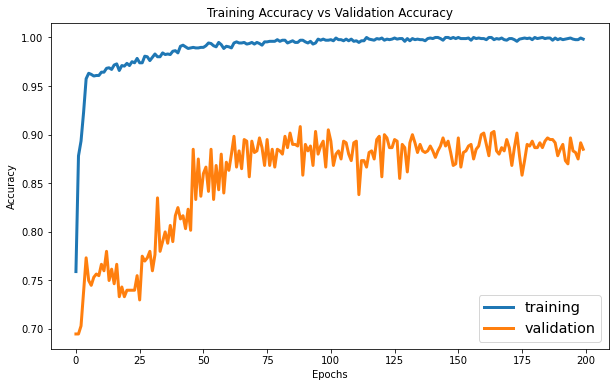

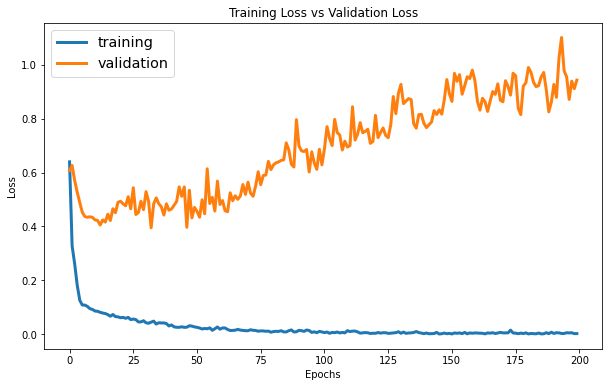

In [119]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

In [120]:
model.load_weights(os.path.join('model',model_ck))

              precision    recall  f1-score   support

    positive       0.94      0.92      0.93       416
    negative       0.83      0.87      0.85       183

    accuracy                           0.91       599
   macro avg       0.89      0.90      0.89       599
weighted avg       0.91      0.91      0.91       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

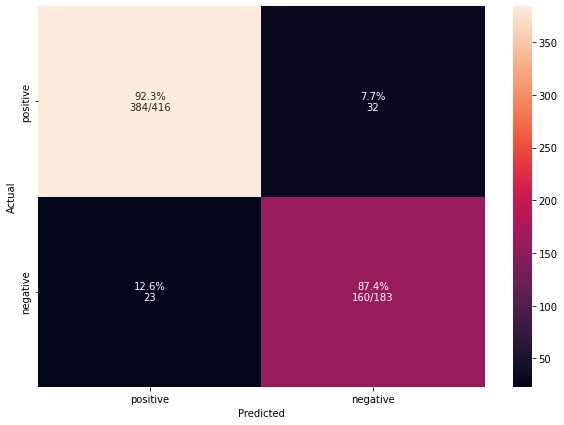

In [121]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['positive', 'negative']

preds = model.predict(img_val)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_val, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")

0.6706114398422091
              precision    recall  f1-score   support

    positive       0.52      0.44      0.47        39
    negative       0.87      0.91      0.89       169

    accuracy                           0.82       208
   macro avg       0.69      0.67      0.68       208
weighted avg       0.81      0.82      0.81       208



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

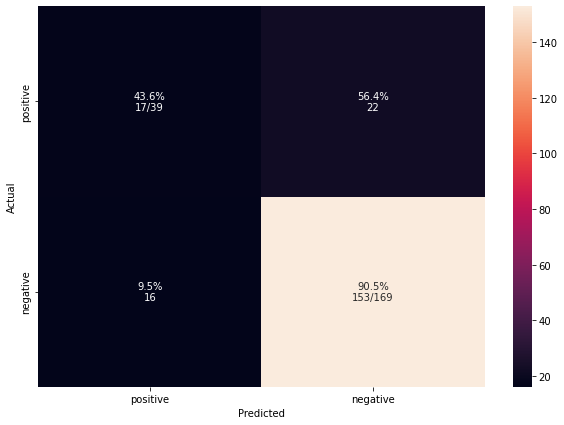

In [122]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, recall_score
matrix_index = ['positive', 'negative']

preds = model.predict(img_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)

recall = recall_score(y_testclass, classpreds, average ='macro')
print(recall)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")